HUSAIN SHABBIR BARAMATIWALA
230013925

***LOADING BOTH THE SHEETS FROM THE GIVEN EXCEL DATA FILE.***

In [1]:
import pandas as pd



file_path = 'online_retail_II.xlsx'

# Load each sheet into a separate DataFrame
data_2009_2010 = pd.read_excel(file_path, sheet_name='Year 2009-2010')
data_2010_2011 = pd.read_excel(file_path, sheet_name='Year 2010-2011')

# Optionally, display the first few rows of each DataFrame to verify
print(data_2009_2010.head())
print(data_2010_2011.head())


/var/folders/k8/7fnvl7c15wjdqsd4zks4cz8w0000gn/T/ipykernel_99801/3477857666.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


  Invoice StockCode                          Description  Quantity  \
0  489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1  489434    79323P                   PINK CHERRY LIGHTS        12   
2  489434    79323W                  WHITE CHERRY LIGHTS        12   
3  489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4  489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   

          InvoiceDate  Price  Customer ID         Country  
0 2009-12-01 07:45:00   6.95      13085.0  United Kingdom  
1 2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
2 2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
3 2009-12-01 07:45:00   2.10      13085.0  United Kingdom  
4 2009-12-01 07:45:00   1.25      13085.0  United Kingdom  
  Invoice StockCode                          Description  Quantity  \
0  536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1  536365     71053                  WHITE METAL LANTERN         6   
2  536365

***CONCATING BOTH THE SHEETS TO PREPARE DATA***

In [2]:


# Combine the two DataFrames
combined_data = pd.concat([data_2009_2010, data_2010_2011], ignore_index=True)

# Check and handle missing values
combined_data.dropna(inplace=True)



In [3]:
print("Dimensions of combined data:", combined_data.shape)

Dimensions of combined data: (824364, 8)


***DATA PIPELINE AND PRE_PROCESSING***

In [4]:
# Convert InvoiceDate to datetime if not already
combined_data['InvoiceDate'] = pd.to_datetime(combined_data['InvoiceDate'])

# Aggregate data to daily level per product
daily_sales = combined_data.groupby([combined_data['InvoiceDate'].dt.date, 'StockCode']).agg({
    'Quantity': 'sum',  # Sum quantities sold per day per product
    'Price': 'mean'     # Calculate average price per day per product
}).reset_index()

In [5]:
# Assuming daily_sales has been defined and loaded
num_stock_codes = daily_sales['StockCode'].nunique()
print("Number of different Stock Codes in daily_sales:", num_stock_codes)


Number of different Stock Codes in daily_sales: 4646


***CREATING A PIVOT TABLE TO USE IT FOR OUR MODEL***

In [6]:

daily_sales.rename(columns={'InvoiceDate': 'Date'}, inplace=True)


daily_sales['Date'] = pd.to_datetime(daily_sales['Date'])

# Create the pivot table
pivot_table = daily_sales.pivot_table(index='Date', columns='StockCode', values='Quantity', fill_value=0)


pivot_table.to_csv('pivot_daily_sales.csv')

print("Pivot table created and saved as 'pivot_daily_sales.csv'.")


Pivot table created and saved as 'pivot_daily_sales.csv'.


In [7]:
# Extract year and month from InvoiceDate
combined_data['Year'] = combined_data['InvoiceDate'].dt.year
combined_data['Month'] = combined_data['InvoiceDate'].dt.month

# Find unique years and months
unique_years = combined_data['Year'].unique()
unique_months_by_year = combined_data.groupby('Year')['Month'].unique()

print("Unique Years in the Dataset:", unique_years)
print("Unique Months by Year:")
print(unique_months_by_year)

Unique Years in the Dataset: [2009 2010 2011]
Unique Months by Year:
Year
2009                                       [12]
2010    [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
2011    [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
Name: Month, dtype: object


In [8]:


# Load the pivot table from CSV
pivot_table = pd.read_csv('pivot_daily_sales.csv', index_col='Date', parse_dates=True)


***CREATING A TRAINING AND A TESTING DATASET***

In [9]:
# Define the split date
split_date = pd.to_datetime('2011-06-30')

# Split the data
train_data = pivot_table.loc[pivot_table.index <= split_date]
test_data = pivot_table.loc[pivot_table.index > split_date]


In [10]:
train_data

,10002,10080,10109,10120,10125,10133,10134,10135,10138,11001,...,C2,CRUK,D,DOT,M,PADS,POST,SP1002,TEST001,TEST002
Date,,,,,,,,,,,,,,,,,,,,,
2009-12-01,12.0,0.0,0.0,60.0,4.0,6.0,0.0,17.0,0.0,0.0,...,0.0,0.0,-2.0,0.0,-1.0,0.0,14.0,0.0,0.0,0.0
2009-12-02,0.0,1.0,0.0,10.0,0.0,0.0,0.0,20.0,96.0,68.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0
2009-12-03,7.0,0.0,4.0,0.0,0.0,40.0,13.0,12.0,35.0,2.0,...,1.0,0.0,0.0,0.0,-2.0,0.0,-3.0,0.0,0.0,0.0
2009-12-04,73.0,3.0,0.0,30.0,46.0,24.0,0.0,10.0,12.0,0.0,...,0.0,0.0,0.0,0.0,2.0,0.0,13.0,0.0,0.0,0.0
2009-12-05,0.0,0.0,0.0,0.0,0.0,10.0,10.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2011-06-26,0.0,0.0,0.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0
2011-06-27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2011-06-28,0.0,0.0,0.0,0.0,0.0,24.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-1.0,0.0,1.0,0.0,0.0,0.0


In [11]:
train_data.shape

(466, 4646)

In [12]:
test_data.shape

(138, 4646)

***CREATION OF SEQUENCES TO FEED IT TO OUR LSTM MODEL***

In [13]:
# Convert DataFrame to NumPy array if needed
import numpy as np
from sklearn.preprocessing import MinMaxScaler
train_data = train_data.values if isinstance(train_data, pd.DataFrame) else train_data
test_data = test_data.values if isinstance(test_data, pd.DataFrame) else test_data

# Initialize the MinMaxScaler and scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
train_scaled = scaler.fit_transform(train_data)
test_scaled = scaler.transform(test_data)

# Create sequences
def create_sequences(data, time_steps=1):
    Xs, ys = [], []
    for i in range(len(data) - time_steps):
        Xs.append(data[i:(i + time_steps)])
        ys.append(data[i + time_steps])
    return np.array(Xs), np.array(ys)

time_steps = 30  # Define the number of time steps for LSTM input
X_train, y_train = create_sequences(train_scaled, time_steps)
X_test, y_test = create_sequences(test_scaled, time_steps)

In [14]:
X_train

array([[[0.30931459, 0.        , 0.        , ..., 0.        ,
         0.2       , 0.        ],
        [0.28822496, 0.02083333, 0.        , ..., 0.        ,
         0.2       , 0.        ],
        [0.30052724, 0.        , 1.        , ..., 0.        ,
         0.2       , 0.        ],
        ...,
        [0.37258348, 0.        , 0.        , ..., 0.        ,
         0.2       , 0.        ],
        [0.28822496, 0.        , 0.        , ..., 0.        ,
         0.2       , 0.        ],
        [0.28822496, 0.        , 0.        , ..., 0.        ,
         0.2       , 0.        ]],

       [[0.28822496, 0.02083333, 0.        , ..., 0.        ,
         0.2       , 0.        ],
        [0.30052724, 0.        , 1.        , ..., 0.        ,
         0.2       , 0.        ],
        [0.41652021, 0.0625    , 0.        , ..., 0.        ,
         0.2       , 0.        ],
        ...,
        [0.28822496, 0.        , 0.        , ..., 0.        ,
         0.2       , 0.        ],
        [0.2

***TRAINING OF OUR LSTM MODEL***

In [15]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

# Define the LSTM model
model = Sequential()
model.add(LSTM(100, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True))
model.add(Dropout(0.2))  # Add dropout to handle sparsity and prevent overfitting
model.add(LSTM(50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=X_train.shape[2]))  # Output layer with one unit per feature

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1, verbose=1)


2024-04-16 21:49:46.223116: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-16 21:49:47.046096: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/50
13/13 [==============================] - 7s 236ms/step - loss: 0.0225 - val_loss: 0.0130
Epoch 2/50
13/13 [==============================] - 2s 155ms/step - loss: 0.0099 - val_loss: 0.0073
Epoch 3/50
13/13 [==============================] - 2s 176ms/step - loss: 0.0071 - val_loss: 0.0065
Epoch 4/50
13/13 [==============================] - 2s 170ms/step - loss: 0.0062 - val_loss: 0.0062
Epoch 5/50
13/13 [==============================] - 2s 150ms/step - loss: 0.0059 - val_loss: 0.0062
Epoch 6/50
13/13 [==============================] - 2s 162ms/step - loss: 0.0057 - val_loss: 0.0062
Epoch 7/50
13/13 [==============================] - 2s 160ms/step - loss: 0.0056 - val_loss: 0.0062
Epoch 8/50
13/13 [==============================] - 2s 176ms/step - loss: 0.0056 - val_loss: 0.0061
Epoch 9/50
13/13 [==============================] - 2s 178ms/step - loss: 0.0055 - val_loss: 0.0061
Epoch 10/50
13/13 [==============================] - 2s 159ms/step - loss: 0.0055 - val_loss: 0.0061

In [16]:
# Evaluate model performance
final_train_loss = history.history['loss'][-1]
final_val_loss = history.history['val_loss'][-1]
print(f"Final training loss: {final_train_loss}")
print(f"Final validation loss: {final_val_loss}")


Final training loss: 0.0049858009442687035
Final validation loss: 0.005949161946773529


In [17]:
# Predict on test data
test_predictions = model.predict(X_test)

# Optionally, calculate some error metric to evaluate the test set performance
# e.g., Mean Absolute Error (MAE)
from sklearn.metrics import mean_absolute_error
test_mae = mean_absolute_error(y_test, test_predictions)
print(f"Test MAE: {test_mae}")


Test MAE: 0.5885942384131242


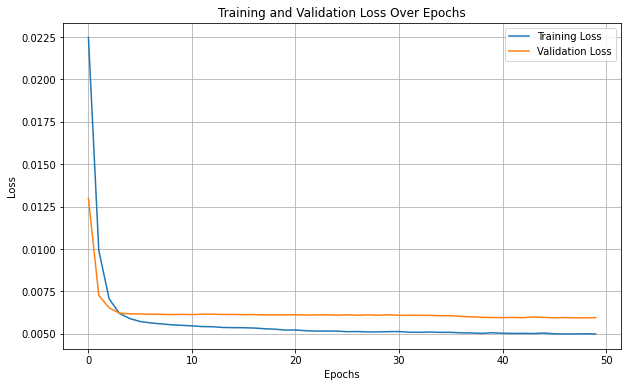

In [18]:
import matplotlib.pyplot as plt

# Assuming 'history' is the object returned by the model.fit() method
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Set up the figure
plt.figure(figsize=(10, 6))
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# Display the plot
plt.show()


In [19]:
import numpy as np
import tensorflow as tf

***ESTIMATING DAILY TOTAL SALE FOR ALL PRODUCTS***

Preparing data 

In [64]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Load the data using the openpyxl engine

# Combine the data from both sheets
combined_datax = pd.concat([data_2009_2010, data_2010_2011])

# Data Cleaning
# Remove rows with missing values in 'InvoiceDate', 'Quantity', 'Price'
combined_datax.dropna(subset=['InvoiceDate', 'Quantity', 'Price'], inplace=True)
# Remove rows with negative or zero quantity
combined_datax = combined_datax[combined_datax['Quantity'] > 0]

# Calculate total sales per transaction
combined_datax['Total_Sales'] = combined_datax['Quantity'] * combined_datax['Price']

# Convert InvoiceDate to datetime
combined_datax['InvoiceDate'] = pd.to_datetime(combined_datax['InvoiceDate'])

# Aggregate sales data daily
daily_salesx = combined_datax.set_index('InvoiceDate').resample('D').agg(Total_Sales=('Total_Sales', 'sum'))



In [65]:
combined_datax['Total_Sales']

0          83.40
1          81.00
2          81.00
3         100.80
4          30.00
           ...  
541905     12.60
541906     16.60
541907     16.60
541908     14.85
541909     18.00
Name: Total_Sales, Length: 1044421, dtype: float64

In [66]:
daily_salesx

,Total_Sales
InvoiceDate,
2009-12-01,54513.50
2009-12-02,63352.51
2009-12-03,74037.91
2009-12-04,40732.92
2009-12-05,9803.05
...,...
2011-12-05,88741.96
2011-12-06,56713.21
2011-12-07,75439.16


In [67]:
(daily_salesx.mean)

<bound method DataFrame.mean of              Total_Sales
InvoiceDate             
2009-12-01      54513.50
2009-12-02      63352.51
2009-12-03      74037.91
2009-12-04      40732.92
2009-12-05       9803.05
...                  ...
2011-12-05      88741.96
2011-12-06      56713.21
2011-12-07      75439.16
2011-12-08      82495.00
2011-12-09     200938.60

[739 rows x 1 columns]>

<Axes: xlabel='InvoiceDate'>

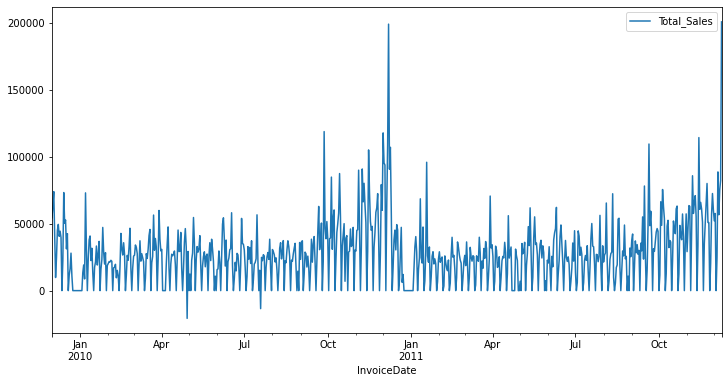

In [68]:
daily_salesx.plot(figsize=(12,6))

Implementing TBATS for comparison and estimation 

In [69]:
from tbats import TBATS
import numpy as np

estimator = TBATS(seasonal_periods=[7, 365.25])  # Weekly and yearly seasonality
model_tbats = estimator.fit(daily_salesx['Total_Sales'])

# Forecast the next 30 days as an example
y_forecast_tbats = model_tbats.forecast(steps=30)

# Output the forecasted values
print(y_forecast_tbats)

[ 68381.15414808  86554.65166247 103362.92861657 106665.89950654
 101341.3185278  108325.98069735  99718.89316304  68103.9402694
  86262.02321135 103054.97218649 106342.70622675 101002.9840364
 107972.60511295  99350.58105516  67720.80062753  85864.16941267
 102642.52196233 105915.78162778 100561.71139646 107517.11501173
  98881.00827951  67237.28413157  85366.85227673 102131.55135054
 105391.30874457 100023.8914418  106966.10713519  98316.97553319
  66660.39342183  84777.27431481]


Implementing ETS for comparison and estimation

In [70]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Fit an ETS model (Exponential Smoothing) with additive settings for trend, seasonality, and error
model_ets = ExponentialSmoothing(daily_salesx['Total_Sales'], trend='add', seasonal='add', seasonal_periods=365).fit()

# Forecast the next 365 days
y_forecast_ets = model_ets.forecast(365)

# Output the forecasted values
print(y_forecast_ets)


2011-12-10     54336.147330
2011-12-11      1615.251875
2011-12-12     11907.383568
2011-12-13     32742.823063
2011-12-14     45094.477897
                  ...      
2012-12-04     39782.431964
2012-12-05     71922.832720
2012-12-06    145202.898093
2012-12-07     65155.659544
2012-12-08     78006.372512
Freq: D, Length: 365, dtype: float64


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [30]:
# Calculate the split index
split_index = int(len(daily_salesx) * 0.8)

# Split the data into training and testing sets
train_daily_sales = daily_salesx.iloc[:split_index]
test_daily_sales = daily_salesx.iloc[split_index:]

# Print the sizes of each dataset and a quick overview
print("Training set size:", len(train_daily_sales))
print("Testing set size:", len(test_daily_sales))
print("\nTraining Data Overview:")
print(train_daily_sales)
print("\nTesting Data Overview:")
print(test_daily_sales)

# Reshape the data to fit the scaler requirements ([samples, features])
train_daily_sales_reshaped = train_daily_sales.values.reshape(-1, 1)
test_daily_sales_reshaped = test_daily_sales.values.reshape(-1, 1)



Training set size: 591
Testing set size: 148

Training Data Overview:
             Total_Sales
InvoiceDate             
2009-12-01      44048.69
2009-12-02      52941.99
2009-12-03      67479.08
2009-12-04      34064.41
2009-12-05       9803.05
...                  ...
2011-07-10       5993.87
2011-07-11      20080.03
2011-07-12      17948.19
2011-07-13      19432.85
2011-07-14      32020.91

[591 rows x 1 columns]

Testing Data Overview:
             Total_Sales
InvoiceDate             
2011-07-15      11857.30
2011-07-16          0.00
2011-07-17      16958.60
2011-07-18      22018.36
2011-07-19      46599.08
...                  ...
2011-12-05      58202.21
2011-12-06      46144.04
2011-12-07      69354.21
2011-12-08      50519.41
2011-12-09     184367.28

[148 rows x 1 columns]


In [71]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(train_daily_sales_reshaped)
scaled_train = scaler.transform(train_daily_sales_reshaped)
scaled_test = scaler.transform(test_daily_sales_reshaped)

In [72]:
scaled_train[:10]

array([[0.38222297],
       [0.45939266],
       [0.58553511],
       [0.29558654],
       [0.08506384],
       [0.21329388],
       [0.28782228],
       [0.38877996],
       [0.26998153],
       [0.33673379]])

In [73]:
from keras.preprocessing.sequence import TimeseriesGenerator
n_input = 3
n_features = 1
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)
X,y = generator[0]
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[0.38222297 0.45939266 0.58553511]
Predict this y: 
 [[0.29558654]]


In [74]:
X.shape

(1, 3, 1)

In [75]:
n_input = 7
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [76]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [77]:
modely = Sequential()
modely.add(LSTM(100, activation='relu', input_shape=(n_input, n_features)))
modely.add(Dense(1))
modely.compile(optimizer='adam', loss='mse')

In [78]:
modely.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 100)               40800     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 101       
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [79]:
# fit model
modely.fit(generator,epochs=50)

Epoch 1/50
584/584 [==============================] - 5s 4ms/step - loss: 0.0200
Epoch 2/50
584/584 [==============================] - 3s 5ms/step - loss: 0.0185
Epoch 3/50
584/584 [==============================] - 2s 4ms/step - loss: 0.0168
Epoch 4/50
584/584 [==============================] - 3s 5ms/step - loss: 0.0145
Epoch 5/50
584/584 [==============================] - 3s 5ms/step - loss: 0.0139
Epoch 6/50
584/584 [==============================] - 3s 5ms/step - loss: 0.0136
Epoch 7/50
584/584 [==============================] - 3s 5ms/step - loss: 0.0125
Epoch 8/50
584/584 [==============================] - 3s 5ms/step - loss: 0.0120
Epoch 9/50
584/584 [==============================] - 2s 4ms/step - loss: 0.0118
Epoch 10/50
584/584 [==============================] - 3s 5ms/step - loss: 0.0119
Epoch 11/50
584/584 [==============================] - 3s 5ms/step - loss: 0.0113
Epoch 12/50
584/584 [==============================] - 3s 5ms/step - loss: 0.0110
Epoch 13/50
584/584 [====

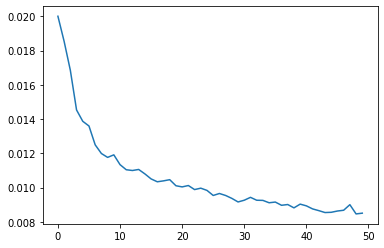

In [80]:
loss_per_epoch = modely.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

In [81]:

last_train_batch = scaled_train[-7:]


In [82]:
print(last_train_batch)

[[0.15235835]
 [0.        ]
 [0.05201051]
 [0.17424011]
 [0.15574153]
 [0.16862435]
 [0.27785451]]


In [83]:
last_train_batch = last_train_batch.reshape((1, n_input, n_features))

In [84]:
modely.predict(last_train_batch)

array([[0.2175216]], dtype=float32)

In [85]:
scaled_test[0]

array([0.10288915])

In [86]:
test_predictionsx = []

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(test_daily_sales_reshaped)):
    
    # get the prediction value for the first batch
    current_pred = modely.predict(current_batch)[0]
    
    # append the prediction into the array
    test_predictionsx.append(current_pred) 
    
    # use the prediction to update the batch and remove the first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [87]:
test_predictionsx

[array([0.2175216], dtype=float32),
 array([0.00971211], dtype=float32),
 array([0.12121044], dtype=float32),
 array([0.21197347], dtype=float32),
 array([0.23610559], dtype=float32),
 array([0.2500916], dtype=float32),
 array([0.27659595], dtype=float32),
 array([0.23528174], dtype=float32),
 array([0.01984464], dtype=float32),
 array([0.15776366], dtype=float32),
 array([0.21868128], dtype=float32),
 array([0.25138393], dtype=float32),
 array([0.26794815], dtype=float32),
 array([0.2813479], dtype=float32),
 array([0.23940992], dtype=float32),
 array([0.02426785], dtype=float32),
 array([0.16116808], dtype=float32),
 array([0.2181537], dtype=float32),
 array([0.2535557], dtype=float32),
 array([0.2728381], dtype=float32),
 array([0.28284132], dtype=float32),
 array([0.23938924], dtype=float32),
 array([0.02949624], dtype=float32),
 array([0.16166165], dtype=float32),
 array([0.21356928], dtype=float32),
 array([0.2478936], dtype=float32),
 array([0.2679482], dtype=float32),
 array([0

In [88]:
print(scaled_test)

[[0.10288915]
 [0.        ]
 [0.14715458]
 [0.19105955]
 [0.40435343]
 [0.23495454]
 [0.26374352]
 [0.12698137]
 [0.        ]
 [0.23252447]
 [0.17083237]
 [0.15005627]
 [0.19832209]
 [0.47029462]
 [0.14960166]
 [0.        ]
 [0.28976304]
 [0.1718831 ]
 [0.17594971]
 [0.23096994]
 [0.53868238]
 [0.17203062]
 [0.        ]
 [0.06574743]
 [0.17145115]
 [0.22523729]
 [0.17234439]
 [0.47192422]
 [0.15593226]
 [0.        ]
 [0.04962165]
 [0.14963082]
 [0.13951198]
 [0.42318799]
 [0.46929187]
 [0.15046054]
 [0.        ]
 [0.1264006 ]
 [0.25704873]
 [0.19436343]
 [0.33509074]
 [0.19519801]
 [0.20922354]
 [0.        ]
 [0.09375831]
 [0.        ]
 [0.07665261]
 [0.17823869]
 [0.32427139]
 [0.26289609]
 [0.        ]
 [0.14755747]
 [0.30976774]
 [0.22123446]
 [0.19061753]
 [0.20121145]
 [0.21816556]
 [0.        ]
 [0.30814483]
 [0.24287196]
 [0.4179175 ]
 [0.19114277]
 [0.62470948]
 [0.20173799]
 [0.        ]
 [0.13663016]
 [0.40442406]
 [0.89754185]
 [0.33410197]
 [0.50214884]
 [0.27577361]
 [0.  

In [89]:
true_test = scaler.inverse_transform(scaled_test)
print(true_test)

[[ 11857.3  ]
 [     0.   ]
 [ 16958.6  ]
 [ 22018.36 ]
 [ 46599.08 ]
 [ 27076.97 ]
 [ 30394.71 ]
 [ 14633.77 ]
 [     0.   ]
 [ 26796.92 ]
 [ 19687.31 ]
 [ 17293.001]
 [ 22855.32 ]
 [ 54198.37 ]
 [ 17240.61 ]
 [     0.   ]
 [ 33393.29 ]
 [ 19808.4  ]
 [ 20277.05 ]
 [ 26617.77 ]
 [ 62079.61 ]
 [ 19825.4  ]
 [     0.   ]
 [  7576.96 ]
 [ 19758.62 ]
 [ 25957.12 ]
 [ 19861.56 ]
 [ 54386.17 ]
 [ 17970.17 ]
 [     0.   ]
 [  5718.57 ]
 [ 17243.97 ]
 [ 16077.84 ]
 [ 48769.64 ]
 [ 54082.81 ]
 [ 17339.59 ]
 [     0.   ]
 [ 14566.84 ]
 [ 29623.18 ]
 [ 22399.11 ]
 [ 38617.01 ]
 [ 22495.29 ]
 [ 24111.64 ]
 [     0.   ]
 [ 10805.03 ]
 [     0.   ]
 [  8833.71 ]
 [ 20540.84 ]
 [ 37370.15 ]
 [ 30297.05 ]
 [     0.   ]
 [ 17005.03 ]
 [ 35698.7  ]
 [ 25495.82 ]
 [ 21967.42 ]
 [ 23188.3  ]
 [ 25142.15 ]
 [     0.   ]
 [ 35511.67 ]
 [ 27989.4  ]
 [ 48162.25 ]
 [ 22027.95 ]
 [ 71993.67 ]
 [ 23248.98 ]
 [     0.   ]
 [ 15745.73 ]
 [ 46607.22 ]
 [103435.81 ]
 [ 38503.06 ]
 [ 57869.36 ]
 [ 31781.1  ]
 [    

In [93]:
true_predictions = scaler.inverse_transform(test_predictionsx)
print(true_predictions)

[[25067.93664868]
 [ 1119.25753423]
 [13968.70818399]
 [24428.55226678]
 [27209.62051684]
 [28821.4177211 ]
 [31875.86878266]
 [27114.67658647]
 [ 2286.96501382]
 [18181.2268801 ]
 [25201.58249192]
 [28970.34890517]
 [30879.26662079]
 [32423.49990527]
 [27590.42316044]
 [ 2796.7107812 ]
 [18573.56436634]
 [25140.78286352]
 [29220.62940343]
 [31442.79958096]
 [32595.60724483]
 [27588.03960207]
 [ 3399.24789219]
 [18630.44520496]
 [24612.45890719]
 [28568.11140882]
 [30879.27348983]
 [31956.06144039]
 [26993.82949003]
 [ 4274.14175119]
 [18451.54781511]
 [23475.79349744]
 [26855.96090181]
 [29095.77078511]
 [30135.76126534]
 [25605.89787417]
 [ 5525.7979678 ]
 [17986.23016766]
 [21645.80796992]
 [24109.92649497]
 [25975.64479096]
 [26893.20486003]
 [23358.7140718 ]
 [ 7648.12701569]
 [17265.10931033]
 [19117.58752343]
 [20421.86791776]
 [21930.36499925]
 [22757.44601675]
 [20562.73827835]
 [12009.44981856]
 [18219.29340637]
 [18380.17157575]
 [18232.23468584]
 [18146.77518839]
 [18637.09

In [95]:
# Flatten the predictions into a list or a 1D numpy array
flattened_predictions = [item[0] for item in test_predictionsx]


In [96]:
import pandas as pd
import matplotlib.pyplot as plt

# Flatten the actual values to match the flattened predictions
flattened_true_values = scaled_test.flatten()

# Create a DataFrame from the true values and predictions
comparison_df = pd.DataFrame({
    'True Values': flattened_true_values,
    'Predictions': flattened_predictions
})

# Display the DataFrame to ensure correctness
print(comparison_df)


     True Values  Predictions
0       0.102889     0.217522
1       0.000000     0.009712
2       0.147155     0.121210
3       0.191060     0.211973
4       0.404353     0.236106
..           ...          ...
143     0.505037     0.160568
144     0.400405     0.160568
145     0.601806     0.160568
146     0.438371     0.160568
147     1.599807     0.160568

[148 rows x 2 columns]


***THE END***